<a href="https://colab.research.google.com/github/DianaElena99/DataScience-Crashcourse/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Use Bag-of-Words to process a list of restaurant reviews and do sentiment analysis on the dataset using several classification methods(Naive Bayes, Support Vector Classifier and Artificial Neural Network).

## Import the libraries 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [5]:
_dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t', quoting=3 )
_dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
print(_dataset.shape[0], '  ', _dataset.shape[1])

1000    2


## Cleaning the dataset

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
_corpus = []
for i in range(_dataset.shape[0]):
  _review = re.sub('[^a-zA-Z]', ' ', _dataset['Review'][i]) #replace non-letter characters with space
  _review = _review.lower()  #replace upper cases with lower cases
  _review = _review.split()   #split the string into words

  _stemmer = PorterStemmer()  #initialize the stemmer

  _eng_stopwords = stopwords.words('english')
  _eng_stopwords.remove('not') #select english stopwords except for 'not'
  _review = [_stemmer.stem(word) for word in _review if not word in set(_eng_stopwords)] #stem all the words except for stopwords
  _review = ' '.join(_review)
  _corpus.append(_review)

In [9]:
_corpus[:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

## Create the Bag-of-Words model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

_cv = CountVectorizer(max_features = 1500)

In [11]:
X = _cv.fit_transform(_corpus).toarray()
Y = _dataset.iloc[:, -1].values

## Split the dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

_naive_bayes = GaussianNB()
_naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [14]:
Y_pred_nb = _naive_bayes.predict(X_test)
print(np.concatenate((Y_pred_nb.reshape(len(Y_pred_nb), 1), Y_test.reshape(len(Y_test), 1)) , 1  ) )

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

0.73


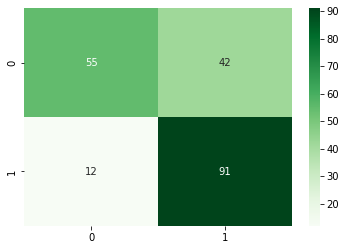

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

_acc_scores = {}
print(accuracy_score(Y_test, Y_pred_nb))
_acc_scores['NaiveBayes'] = accuracy_score(Y_test, Y_pred_nb)
_matrix = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(_matrix, annot=True, cmap="Greens")

## Support Vector Classifier

In [16]:
from sklearn.svm import SVC 

_svc = SVC(kernel = 'linear')
_svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [17]:
Y_pred_svc = _svc.predict(X_test)


0.79


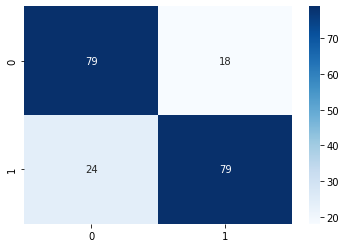

In [18]:
print(accuracy_score(Y_test, Y_pred_svc))
_matrix = confusion_matrix(Y_test, Y_pred_svc)
sns.heatmap(_matrix, annot=True, cmap="Blues")

In [19]:
_acc_scores['SVC'] = accuracy_score(Y_test, Y_pred_svc)

## Artificial Neural Network

In [31]:
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.models import Sequential

In [63]:
_model = Sequential()

_model.add(Dense(units=1000, input_shape=(None,32,1500), activation='relu'))
_model.add(Dense(100, activation='relu'))
_model.add(Dense(25, activation='relu'))
_model.add(Dense(1, activation='sigmoid'))

_model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, None, 32, 1000)    1501000   
                                                                 
 dense_49 (Dense)            (None, None, 32, 100)     100100    
                                                                 
 dense_50 (Dense)            (None, None, 32, 25)      2525      
                                                                 
 dense_51 (Dense)            (None, None, 32, 1)       26        
                                                                 
Total params: 1,603,651
Trainable params: 1,603,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
_model.fit(X_train, Y_train)

25/25 [==============================] - 1s 13ms/step - loss: 0.6388 - accuracy: 0.6900
